# Analyis of the Simple Model Results

**Authorship:**
Adam Klie, *05/04/2022*
***
**Description:**
Notebook to do some cool stuff
***
<div class="alert alert-block alert-warning">
<b>TODOs</b>:
<ul>
    <b><li></li></b>
    <b><li></li></b>
    <b><li></li></b>
    </ul>
</div>

# Set-up

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

In [68]:
MODEL = "hybrid"
STRAND = "ss"
TASK = "regression"

# Instantiate model and data via config

In [3]:
import pytorch_lightning as pl
from pytorch_lightning.utilities.cli import LightningArgumentParser

## Model

In [4]:
import claim.utils as cu
from eugene.models.hybrid import hybrid

In [5]:
model_parser = LightningArgumentParser()
model_parser.add_lightning_class_args(hybrid, nested_key="model");
model_config = "/cellar/users/aklie/projects/EUGENE/config/models/benchmark1/sshybrid_reg.yaml"
model_yml = model_parser.parse_path(cfg_path=model_config)
eugene = hybrid(**model_yml["model"])
eugene

hybrid(
  (convnet): BasicConv1D(
    (module): Sequential(
      (0): Conv1d(4, 32, kernel_size=(15,), stride=(1,))
      (1): ReLU(inplace=True)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
      (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Conv1d(32, 64, kernel_size=(5,), stride=(1,))
      (6): ReLU(inplace=True)
      (7): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
      (8): Dropout(p=0.2, inplace=False)
      (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (recurrentnet): BasicRecurrent(
    (module): LSTM(64, 64, batch_first=True)
  )
  (fcnet): BasicFullyConnectedModule(
    (module): Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU(inplace=True)
      (2): Dropout(p=0.2, inplace=False)
      (3): BatchNorm1d(32, eps=1e-05, mo

# Load data

In [6]:
from eugene.dataloading.SeqDataModule import SeqDataModule

In [7]:
data_parser = LightningArgumentParser()
data_parser.add_lightning_class_args(SeqDataModule, nested_key="data");
data_config = "/cellar/users/aklie/projects/EUGENE/config/data/benchmark1/2021_OLS_Library_Training_OHE-T_reg_train.yaml"
data_yml = data_parser.parse_path(cfg_path=data_config)
data_mod = SeqDataModule(**data_yml["data"])

# Train with PyTorch Lightning

In [8]:
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [9]:
LOG_DIR = "/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg"
logger = TensorBoardLogger(LOG_DIR, name=f"{STRAND}{MODEL}", version="2022_06_04_OHE_Baseline")
early_stop_callback = EarlyStopping(monitor="val_loss", patience=5, verbose=False, mode="min")
trainer = pl.Trainer(gpus=1, max_epochs=100, logger=logger, callbacks=[early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [35]:
trainer.fit(model=eugene, datamodule=data_mod)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.

  | Name         | Type                      | Params
-----------------------------------------------------------
0 | convnet      | BasicConv1D               | 12.4 K
1 | recurrentnet | BasicRecurrent            | 33.3 K
2 | fcnet        | BasicFullyConnectedModule | 2.2 K 
3 | r_squared    | R2Score                   | 0     
-----------------------------------------------------------
47.9 K    Trainable params
0         Non-trainable params
47.9 K    Total params
0.192     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

# Predict on all sequences

In [32]:
from eugene.utils.custom_callbacks import PredictionWriter

In [33]:
tmp = "/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/sshybrid/2022_06_04_OHE_Baseline/checkpoints/epoch=29-step=12149.ckpt"

In [34]:
#eugene = hybrid.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
eugene = hybrid.load_from_checkpoint(tmp)

## Train and val seqs

In [39]:
training_data_config = "/cellar/users/aklie/projects/EUGENE/config/data/benchmark1/2021_OLS_Library_Training_OHE-T_reg_test.yaml"
training_data_yml = data_parser.parse_path(cfg_path=training_data_config)
training_data_mod = SeqDataModule(**training_data_yml["data"])

In [40]:
PRED_DIR="/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/sshybrid/2022_06_04_OHE_Baseline/predictions/2021_OLS_Library_Training_"
prediction_writer_callback = PredictionWriter(PRED_DIR)
training_trainer = pl.Trainer(gpus=1, logger=False, callbacks=[prediction_writer_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [41]:
training_res = training_trainer.predict(model=eugene, datamodule=training_data_mod)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x1554c05f0560>
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x1554c05f0560>  File "/cellar/users/aklie/opt/miniconda3/envs/pytorch_dev/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__

Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x1554c05f0560>
  File "/cellar/users/aklie/opt/miniconda3/envs/pytorch_dev/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
Traceback (most recent call last):
  File "/cellar/users/aklie/opt/miniconda3/envs/pytorch_dev/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
        self._shutdown_workers()    
self._shutdown_workers()self._shutdown_workers()

  File "/cellar/users/aklie/opt/miniconda3/envs/pytorch_dev/lib/python3.7/site-packages/torch/utils/data/data

/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/sshybrid/2022_06_04_OHE_Baseline/predictions


In [49]:
training_res[0]

array([['S1-G1F-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6', '0.29461366',
        '0.313011'],
       ['S1-G1R-S2-E1F-S3-E2F-S4-G2F-S5-G3F-S6', '0.33692977',
        '0.387121'],
       ['S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3R-S6', '0.30566525', '0.0'],
       ...,
       ['S2-G1R-S3-E1R-S1-E2R-S5-G2F-S4-G3R-S6', '0.016437337', '0.0'],
       ['S2-G1F-S3-E1R-S1-E2R-S5-G2F-S4-G3R-S6', '0.1990816', '0.239418'],
       ['S2-G1R-S3-E1F-S4-E2F-S1-G2R-S5-G3F-S6', '0.016040511', '0.0']],
      dtype='<U37')

In [95]:
train_names = np.loadtxt("/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark2/reg/names/train.txt", dtype=str)
val_names = np.loadtxt("/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark2/reg/names/val.txt", dtype=str)

In [93]:
PRED_DIR="/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark2/reg/sshybrid/2022_05_19_Pipeline_Test2/predictions/2021_OLS_Library_All_"

In [96]:
training_predictions = pd.read_csv(f"{PRED_DIR}predictions.tsv", sep="\t", index_col=0)

In [97]:
train_predictions = training_predictions.loc[train_names]

In [98]:
val_predictions = training_predictions.loc[val_names]

In [99]:
from sklearn.metrics import r2_score, mean_squared_error

In [109]:
mean_squared_error(train_predictions["TARGET"], train_predictions["PREDICTION"])

0.16664355884642104

In [108]:
mean_squared_error(val_predictions["TARGET"], val_predictions["PREDICTION"])

0.15812134607584752

In [102]:
train_r2_score = round(r2_score(train_predictions["TARGET"], train_predictions["PREDICTION"]), 3)
train_mse = round(mean_squared_error(train_predictions["TARGET"], train_predictions["PREDICTION"]), 3)

val_r2_score = round(r2_score(val_predictions["TARGET"], val_predictions["PREDICTION"]), 3)
val_mse = round(mean_squared_error(val_predictions["TARGET"], val_predictions["PREDICTION"]), 3)

In [105]:
ax = ax[0]

In [ ]:
ax.se

Text(0.5, 1.0, 'Val Set')

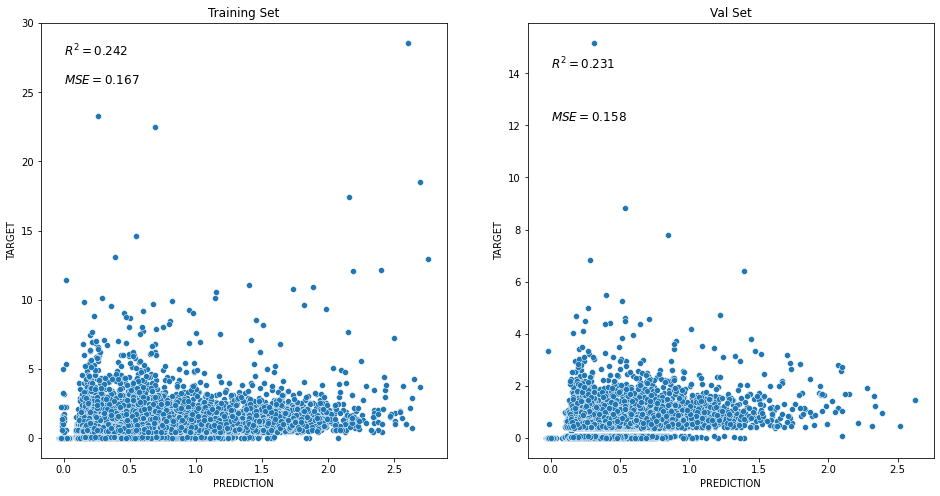

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(data=train_predictions, y="TARGET", x="PREDICTION", ax=ax[0])
ax[0].text(0, max(train_predictions["TARGET"])-1, r"$R^2= $" + str(train_r2_score), fontsize=12)
ax[0].text(0, max(train_predictions["TARGET"])-3, r"$MSE= $" + str(train_mse), fontsize=12)
ax[0].set_title("Training Set")

sns.scatterplot(data=val_predictions, y="TARGET", x="PREDICTION", ax=ax[1])
ax[1].text(0, max(val_predictions["TARGET"])-1, r"$R^2= $" + str(val_r2_score), fontsize=12)
ax[1].text(0, max(val_predictions["TARGET"])-3, r"$MSE= $" + str(val_mse), fontsize=12)
ax[1].set_title("Val Set")

## Heldout sequences

In [16]:
holdout_data_config = "/cellar/users/aklie/projects/EUGENE/config/data/benchmark1/2021_OLS_Library_Holdout_OHE-T_reg_test.yaml"
holdout_data_yml = data_parser.parse_path(cfg_path=holdout_data_config)
holdout_data_mod = SeqDataModule(**holdout_data_yml["data"])

In [110]:
PRED_DIR="/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/sshybrid/2022_06_04_OHE_Baseline/predictions/2021_OLS_Library_Holdout_"
prediction_writer_callback = PredictionWriter(PRED_DIR)
holdout_trainer = pl.Trainer(gpus=1, logger=False, callbacks=[prediction_writer_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [18]:
holdout_trainer.predict(model=eugene, datamodule=holdout_data_mod)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/sshybrid/2022_06_04_OHE_Baseline/predictions


[array([['S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6', '0.39519334',
         '0.611767'],
        ['S3-G1R-S2-E1R-S5-E2R-S4-G2R-S1-G3R-S6', '0.19436541',
         '0.327604'],
        ['S1-G1R-S4-E1F-S3-G2R-S5-G3F-S2-E2F-S6', '0.27180946', '1.1913'],
        ['S5-G1F-S1-E2R-S3-E1F-S4-G3F-S2-G2R-S6', '0.23671728', '0.40054'],
        ['S1-G1R-S5-E2R-S2-G2F-S4-E1R-S3-G3R-S6', '1.4144309', '1.687609'],
        ['S5-G1F-S4-E2F-S3-G2F-S2-G3R-S1-E1R-S6', '0.17860284',
         '0.275716'],
        ['S2-G1R-S1-G2R-S4-E1R-S5-E2F-S3-G3F-S6', '0.015490763',
         '0.275716'],
        ['S2-G1F-S1-G2R-S3-E1F-S5-G3R-S4-E2F-S6', '0.28651178',
         '0.484927'],
        ['S2-G1F-S1-G2R-S3-E1R-S5-G3R-S4-E2F-S6', '0.23490517', '0.39112'],
        ['S2-G1R-S3-G2R-S1-E1R-S4-G3F-S5-E2F-S6', '0.01720298',
         '0.275716'],
        ['S4-G1R-S2-G2R-S5-E2F-S1-E1F-S3-G3R-S6', '0.25212288',
         '0.155094'],
        ['S4-G1R-S2-G2R-S5-E2F-S1-E1R-S3-G3R-S6', '0.3367386', '0.893989'],
        ['S5-G1F-S

In [111]:
holdout_predictions = pd.read_csv(f"{PRED_DIR}predictions.tsv", sep="\t", index_col=0)

In [112]:
holdout_predictions

,PREDICTION,TARGET
NAME,,
S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6,0.395193,0.611767
S3-G1R-S2-E1R-S5-E2R-S4-G2R-S1-G3R-S6,0.194365,0.327604
S1-G1R-S4-E1F-S3-G2R-S5-G3F-S2-E2F-S6,0.271809,1.191300
S5-G1F-S1-E2R-S3-E1F-S4-G3F-S2-G2R-S6,0.236717,0.400540
S1-G1R-S5-E2R-S2-G2F-S4-E1R-S3-G3R-S6,1.414431,1.687609
...,...,...
S1-G3F-S3-G2F-S2-E1R-S5-G1R-S4-E2F-S6,0.212637,0.275716
S3-G3F-S4-G2R-S2-E1R-S5-G1R-S1-E2F-S6,0.197838,0.100337
S3-G3F-S4-G2R-S2-E1R-S5-G1F-S1-E2F-S6,0.191739,0.111748


## All Genomic Sequences

In [29]:
genomic_data_config = "/cellar/users/aklie/projects/EUGENE/config/data/benchmark1/All_Genomic_Sequences_TSV_reg_test.yaml"
genomic_data_yml = data_parser.parse_path(cfg_path=genomic_data_config)
genomic_data_mod = SeqDataModule(**genomic_data_yml["data"])

In [113]:
PRED_DIR="/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/sshybrid/2022_06_04_OHE_Baseline/predictions/All_Genomic_Sequences_"
prediction_writer_callback = PredictionWriter(PRED_DIR)
genomic_trainer = pl.Trainer(gpus=1, logger=False, callbacks=[prediction_writer_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [31]:
genomic_trainer.predict(model=eugene, datamodule=genomic_data_mod)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/cellar/users/aklie/projects/EUGENE/results/benchmark/benchmark1/reg/sshybrid/2022_06_04_OHE_Baseline/predictions


[array([['scaffold_1:462149:462232', '0.28212819', '1.0']], dtype='<U32'),
 array([['scaffold_102:102675:102754', '0.22521664', '1.0']], dtype='<U32'),
 array([['scaffold_3:475040:475120', '0.1984604', '1.0']], dtype='<U32'),
 array([['scaffold_3:781073:781145', '0.26546252', '1.0']], dtype='<U32'),
 array([['scaffold_357:46416:46496', '0.2004138', '0.0']], dtype='<U32'),
 array([['scaffold_577:39771:39829', '0.25927883', '0.0']], dtype='<U32'),
 array([['scaffold_6:512297:512370', '0.21518195', '0.0']], dtype='<U32'),
 array([['scaffold_98:245430:245507', '0.25188348', '1.0']], dtype='<U32'),
 array([['scaffold_248:118347:118482', '0.270935', '1.0']], dtype='<U32'),
 array([['Scaffold_31:173924:174038', '0.18309236', '0.0']], dtype='<U32'),
 array([['scaffold_6:562995:563124', '0.25786528', '1.0']], dtype='<U32'),
 array([['scaffold_11:490974:491037', '0.20076609', '0.0']], dtype='<U32'),
 array([['scaffold_366:40184:40258', '0.26836064', '0.0']], dtype='<U32'),
 array([['scaffold_37:

In [114]:
genomic_predictions = pd.read_csv(f"{PRED_DIR}predictions.tsv", sep="\t", index_col=0)

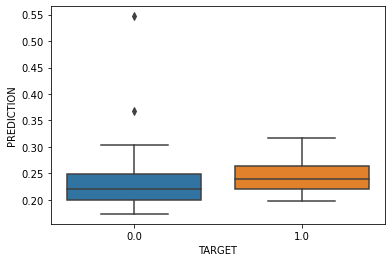

In [116]:
sns.boxplot(data=genomic_predictions, x="TARGET", y="PREDICTION")

# Scratch